**Loan Elegibility Process** to be **Automated**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv("loan_data.csv")

In [44]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


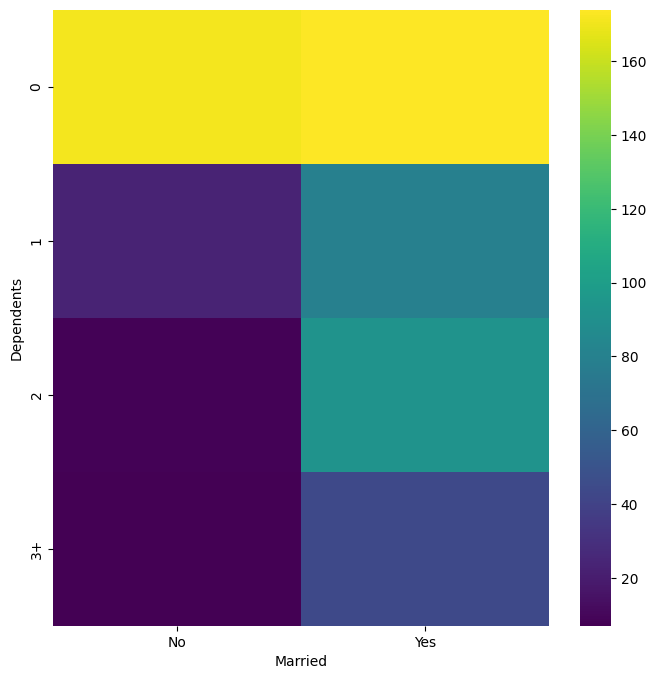

In [45]:
# @title Married vs Dependents

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dependents'].value_counts()
    for x_label, grp in data.groupby('Married')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Married')
_ = plt.ylabel('Dependents')

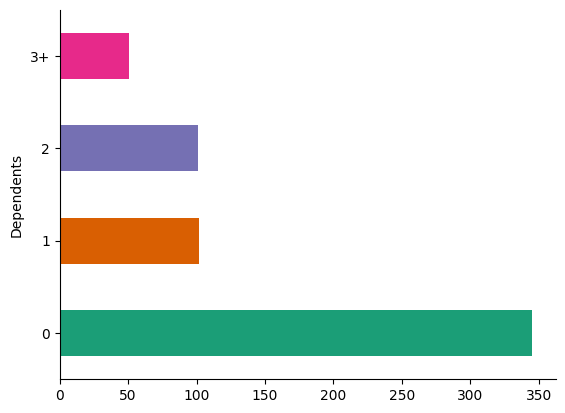

In [46]:
# @title Dependents

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

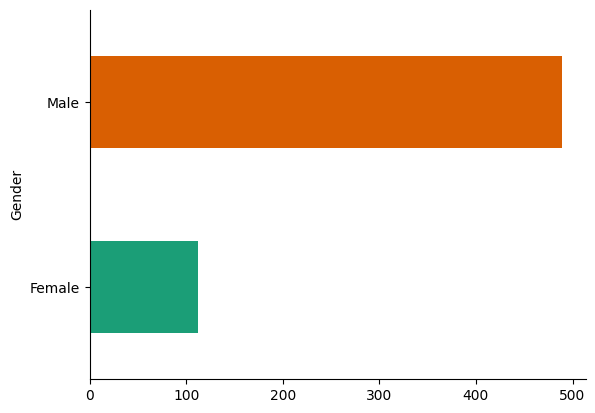

In [47]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

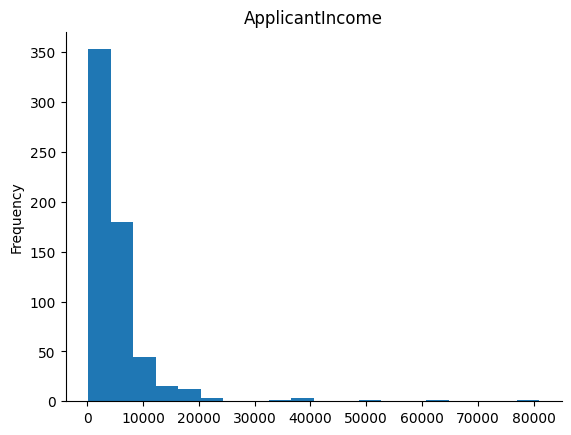

In [48]:
# @title ApplicantIncome

from matplotlib import pyplot as plt
data['ApplicantIncome'].plot(kind='hist', bins=20, title='ApplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [50]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [51]:
# Define a mapping dictionary
education_mapping = {
    'Graduate': 1.0,
    'Not Graduate': 0.0
}

# Apply mapping to convert 'Education' column to numeric
data['Education'] = data['Education'].map(education_mapping)


**Looking for Correlations**

Loan_Status          1.000000
Credit_History       0.561678
Married              0.096657
Education            0.085884
Property_Area        0.032112
Self_Employed        0.010880
Gender               0.008690
ApplicantIncome     -0.004710
Dependents          -0.007318
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64


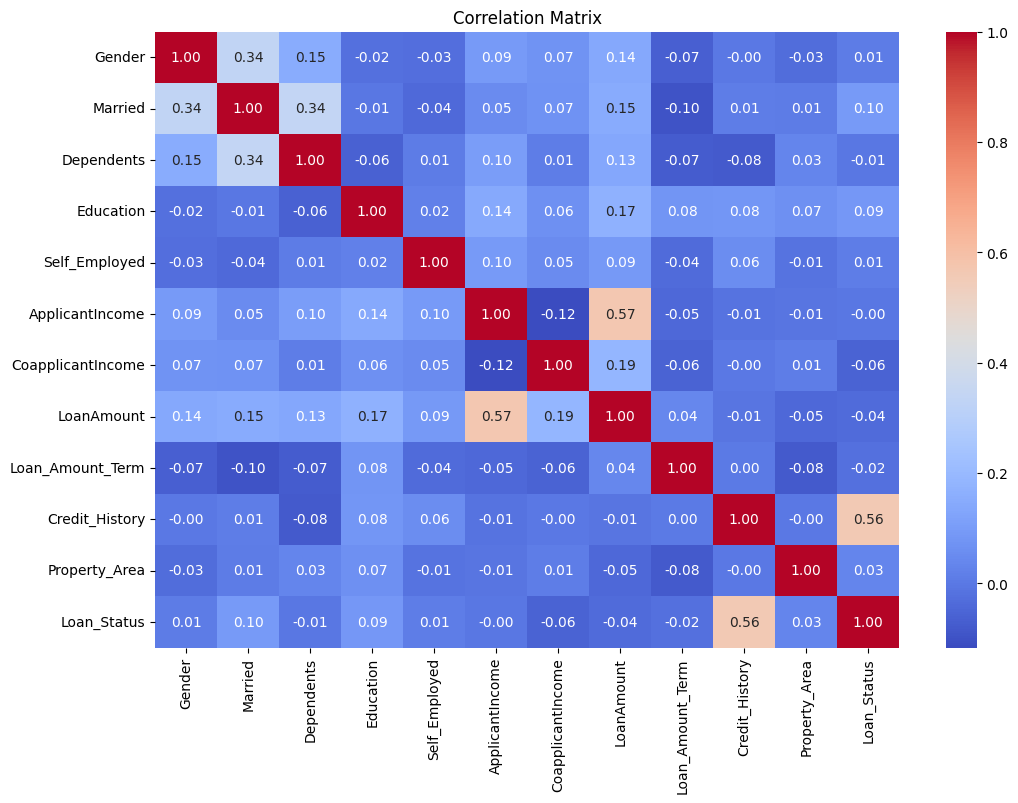

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))  # Ensure all data is string for LabelEncoder
    label_encoders[column] = le

# Exclude 'Loan_ID' column for correlation computation
data_numeric = data.drop(columns=['Loan_ID'])

# Compute correlation matrix
correlation_matrix = data_numeric.corr()

# Extract correlations with target variable (Loan_Status)
correlation_with_target = correlation_matrix['Loan_Status'].sort_values(ascending=False)

# Print correlation with target variable
print(correlation_with_target)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [53]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


# **Data Exploration and Visualization:**

Explore the data further to gain deeper insights. Visualize distributions, relationships between variables, and explore any anomalies or patterns.


# **Feature Engineering: **

Create new features or transform existing ones that might improve model performance. For example, you could create new features like total income (combining ApplicantIncome and CoapplicantIncome), or derive categorical features from numerical ones (e.g., binning income levels).


# **Handling Imbalanced Data (if applicable):**

Check if the dataset has imbalanced classes (e.g., significantly more approved loans than denied loans). If imbalance exists, consider techniques such as oversampling minority class instances (e.g., SMOTE) or undersampling majority class instances to balance the dataset.


# **Model Selection and Evaluation:**

Choose appropriate machine learning models based on the problem (classification) and data characteristics. Consider models like Logistic Regression, Decision Trees, Random Forests, Gradient Boosting Machines, or even neural networks depending on the complexity and size of your dataset.
Evaluate model performance using suitable metrics (accuracy, precision, recall, F1-score, ROC AUC) and validate using techniques like cross-validation to ensure robustness.


# Hyperparameter Tuning:

Optimize model performance by tuning hyperparameters using techniques such as grid search or randomized search. This helps in finding the best set of parameters for your chosen model.


# **Model Interpretation:**

Interpret the model predictions to understand which features are most influential in determining loan eligibility. Techniques like feature importance from tree-based models or SHAP (SHapley Additive exPlanations) values can help in this regard.


# **Deployment and Monitoring:**

Once satisfied with model performance, deploy the model into production. Ensure monitoring mechanisms are in place to track model performance over time and handle concept drift if applicable.


# **Ethical Considerations:**

Given the domain of financial services, consider fairness and bias in your models. Ensure that decisions made by your model are fair across different demographic groups.


# **Documentation and Reporting:**

Document your entire process, from data preprocessing to model development and evaluation. Prepare a report or presentation to communicate your findings and results effectively.

In [54]:
# Check for missing values in the entire dataset
missing_values = data.isna().sum()

# Print the number of missing values for each column
print(missing_values)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [55]:
import pandas as pd

# Assuming data is your DataFrame

# Fill missing values in LoanAmount with the median
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

# Fill missing values in Loan_Amount_Term with the median
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

# Fill missing values in Credit_History with the median
data['Credit_History'].fillna(data['Credit_History'].median(), inplace=True)

# Verify if all missing values are handled
print(data.isna().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\waghv\AppData\Local\Temp\ipykernel_1624\512004238.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
C:\Users\waghv\AppData\Local\Temp\ipykernel_1624\512004238.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [56]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [57]:


# Drop the Loan_ID column
data.drop(columns=['Loan_ID'], inplace=True)

# Display the first few rows of the data to confirm
print(data.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

In [58]:
# Example: Creating a combined feature of Credit_History and Education
data['CreditHistoryEducation'] = data['Credit_History'] * data['Education']

# Example: Binning ApplicantIncome into categories
bins = [0, 2500, 4000, 6000, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High']
data['ApplicantIncomeBin'] = pd.cut(data['ApplicantIncome'], bins=bins, labels=labels)

# Example: Creating a new feature based on loan amount relative to total income
data['LoanAmountTotalIncomeRatio'] = data['LoanAmount'] / (data['ApplicantIncome'] + data['CoapplicantIncome'])

# Display the updated dataframe with new features
print(data.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  CreditHistoryEducation ApplicantIncomeBin  \
0              2            1           

In [59]:
# Check current column names to verify 'ApplicantIncomeBin' exists
print(data.columns)

# Drop 'ApplicantIncomeBin' if it exists
if 'ApplicantIncomeBin' in data.columns:
    data.drop(columns=['ApplicantIncomeBin'], inplace=True)
    print("Column 'ApplicantIncomeBin' dropped.")
else:
    print("Column 'ApplicantIncomeBin' not found.")

# Display the updated dataframe
print(data.head())


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'CreditHistoryEducation', 'ApplicantIncomeBin',
       'LoanAmountTotalIncomeRatio'],
      dtype='object')
Column 'ApplicantIncomeBin' dropped.
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0   

In [60]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CreditHistoryEducation,LoanAmountTotalIncomeRatio
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,1.0,0.021884
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1.0,0.021015
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,1.0,0.022000
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,0.0,0.024287
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,1.0,0.023500


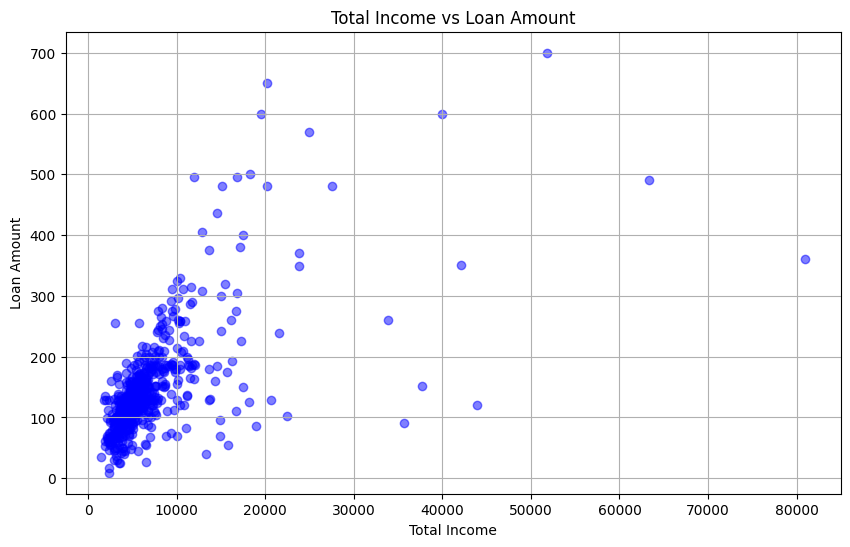

In [61]:
import matplotlib.pyplot as plt

# Calculate TotalIncome
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['TotalIncome'], data['LoanAmount'], color='blue', alpha=0.5)
plt.title('Total Income vs Loan Amount')
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()


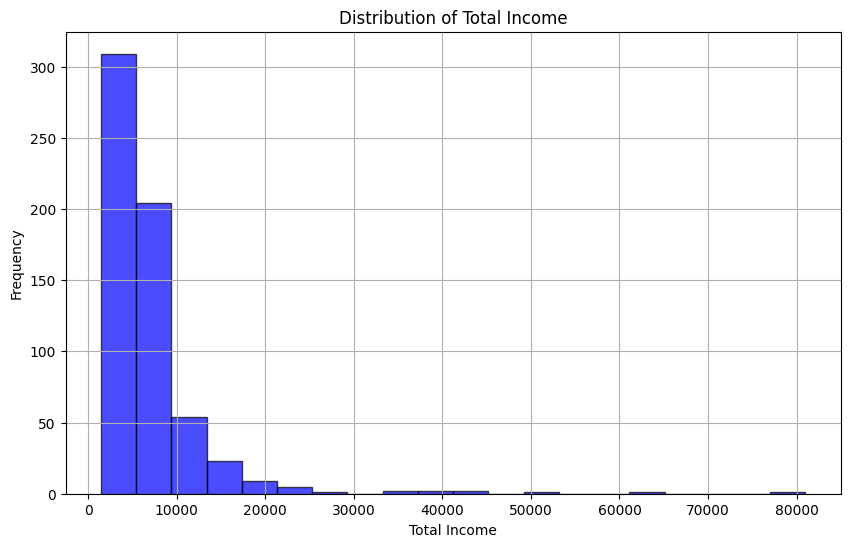

In [62]:
import matplotlib.pyplot as plt

# Calculate TotalIncome
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(data['TotalIncome'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


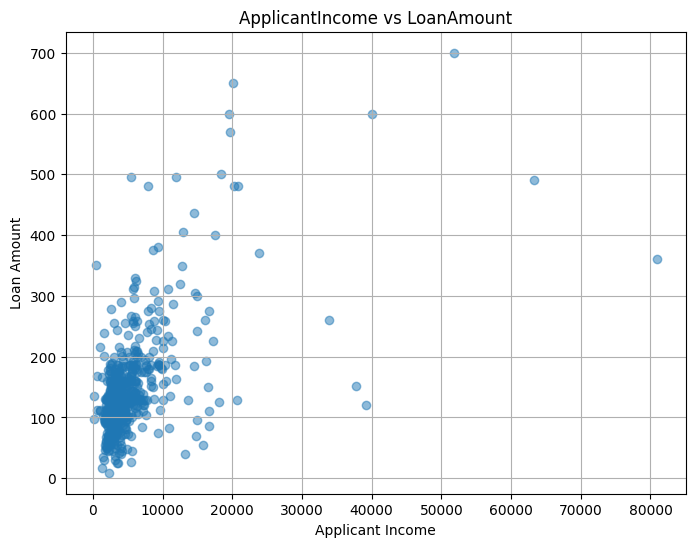

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(data['ApplicantIncome'], data['LoanAmount'], alpha=0.5)
plt.title('ApplicantIncome vs LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()


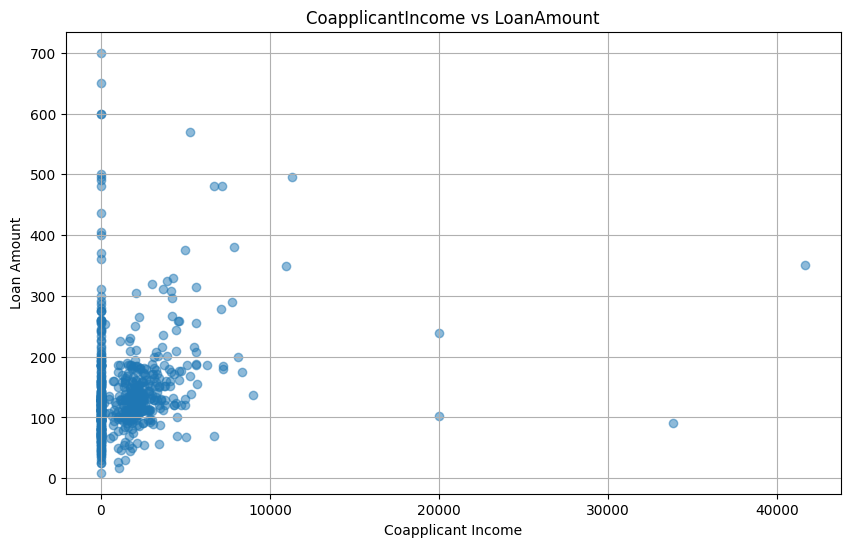

In [64]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['CoapplicantIncome'], data['LoanAmount'], alpha=0.5)
plt.title('CoapplicantIncome vs LoanAmount')
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()


In [65]:
# Calculate TotalIncome
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Drop ApplicantIncome and CoapplicantIncome columns
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

# Verify the changes
print(data.head())


   Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
0       1        0           0          1              0       128.0   
1       1        1           1          1              0       128.0   
2       1        1           0          1              1        66.0   
3       1        1           0          0              0       120.0   
4       1        0           0          1              0       141.0   

   Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  \
0             360.0             1.0              2            1   
1             360.0             1.0              0            0   
2             360.0             1.0              2            1   
3             360.0             1.0              2            1   
4             360.0             1.0              2            1   

   CreditHistoryEducation  LoanAmountTotalIncomeRatio  TotalIncome  
0                     1.0                    0.021884       5849.0  
1                     1.0 

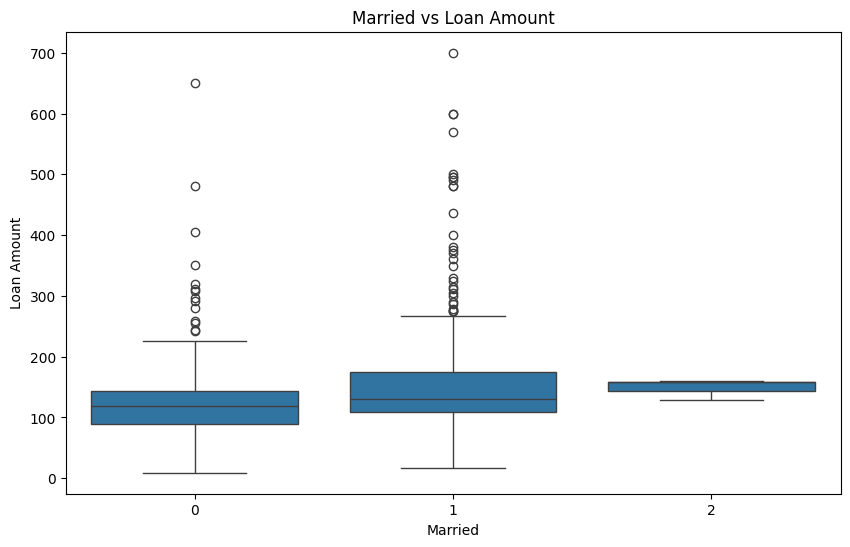

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Married vs LoanAmount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Married', y='LoanAmount', data=data)
plt.title('Married vs Loan Amount')
plt.xlabel('Married')
plt.ylabel('Loan Amount')
plt.show()


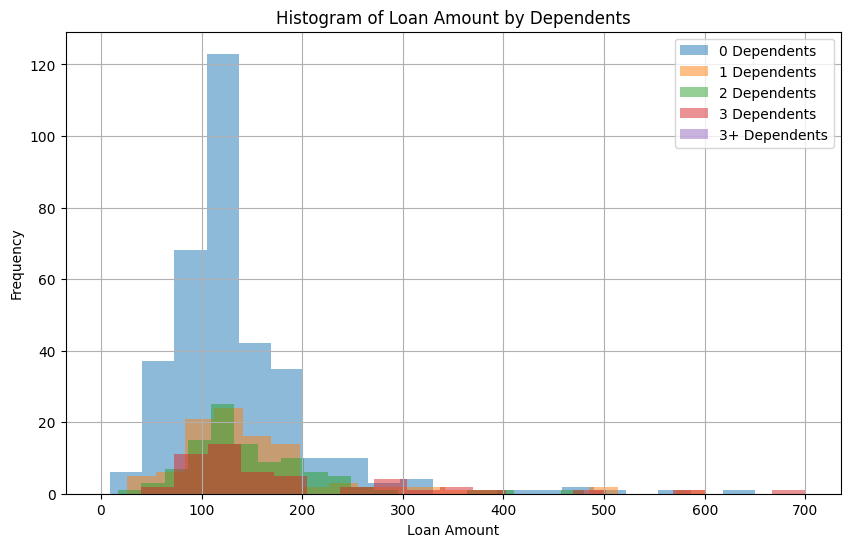

In [67]:
import matplotlib.pyplot as plt

# Filter out NaN values for Dependents and LoanAmount
filtered_data = data.dropna(subset=['Dependents', 'LoanAmount'])

# Plot histogram for Dependents vs LoanAmount
plt.figure(figsize=(10, 6))
plt.hist(filtered_data[filtered_data['Dependents'] == 0]['LoanAmount'], bins=20, alpha=0.5, label='0 Dependents')
plt.hist(filtered_data[filtered_data['Dependents'] == 1]['LoanAmount'], bins=20, alpha=0.5, label='1 Dependents')
plt.hist(filtered_data[filtered_data['Dependents'] == 2]['LoanAmount'], bins=20, alpha=0.5, label='2 Dependents')
plt.hist(filtered_data[filtered_data['Dependents'] == 3]['LoanAmount'], bins=20, alpha=0.5, label='3 Dependents')
plt.hist(filtered_data[filtered_data['Dependents'] == '3+']['LoanAmount'], bins=20, alpha=0.5, label='3+ Dependents')

plt.title('Histogram of Loan Amount by Dependents')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CreditHistoryEducation,LoanAmountTotalIncomeRatio,TotalIncome
0,1,0,0,1,0,128.0,360.0,1.0,2,1,1.0,0.021884,5849.0
1,1,1,1,1,0,128.0,360.0,1.0,0,0,1.0,0.021015,6091.0
2,1,1,0,1,1,66.0,360.0,1.0,2,1,1.0,0.022000,3000.0
3,1,1,0,0,0,120.0,360.0,1.0,2,1,0.0,0.024287,4941.0
4,1,0,0,1,0,141.0,360.0,1.0,2,1,1.0,0.023500,6000.0


Ok feature engineering part done from my side let's move forward

In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import joblib
import xgboost as xgb
import lightgbm as lgb


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define numeric features
numeric_features = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
    'CreditHistoryEducation', 'LoanAmountTotalIncomeRatio', 'TotalIncome'
]

# Create transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [71]:
# Define individual models
rf_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
lgbm_model = lgb.LGBMClassifier(random_state=42)


In [72]:
# Define ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', Pipeline([('preprocessor', numeric_transformer), ('classifier', rf_model)])),
        ('gbm', Pipeline([('preprocessor', numeric_transformer), ('classifier', gbm_model)])),
        ('xgb', Pipeline([('preprocessor', numeric_transformer), ('classifier', xgb_model)])),
        ('lgbm', Pipeline([('preprocessor', numeric_transformer), ('classifier', lgbm_model)]))
    ],
    voting='soft'  # Use 'hard' for majority voting, 'soft' for weighted probabilities
)


In [73]:
# Define features and target
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ensemble_model.predict(X_test)
ensemble_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])

print("Ensemble Model Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {ensemble_auc}')


[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

c:\Users\waghv\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [75]:
param_grid_lgbm = {
    'classifier__num_leaves': [31, 40, 50],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [100, 200, 300]
}


In [76]:
from sklearn.model_selection import GridSearchCV

# LightGBM grid search
lgbm_grid_search = GridSearchCV(
    estimator=Pipeline([('preprocessor', numeric_transformer), ('classifier', lgb.LGBMClassifier(random_state=42))]),
    param_grid=param_grid_lgbm,
    cv=3,
    n_jobs=-1,
    verbose=2
)

lgbm_grid_search.fit(X_train, y_train)
best_lgbm_model = lgbm_grid_search.best_estimator_

# Repeat for other models


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [77]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

param_grid_gbm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}

param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}

param_grid_lgbm = {
    'classifier__num_leaves': [31, 40, 50],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [100, 200, 300]
}


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# RandomForest grid search
rf_grid_search = GridSearchCV(
    estimator=Pipeline([('preprocessor', numeric_transformer), ('classifier', RandomForestClassifier(random_state=42))]),
    param_grid=param_grid_rf,
    cv=3,
    n_jobs=-1,
    verbose=2
)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# GradientBoosting grid search
gbm_grid_search = GridSearchCV(
    estimator=Pipeline([('preprocessor', numeric_transformer), ('classifier', GradientBoostingClassifier(random_state=42))]),
    param_grid=param_grid_gbm,
    cv=3,
    n_jobs=-1,
    verbose=2
)
gbm_grid_search.fit(X_train, y_train)
best_gbm_model = gbm_grid_search.best_estimator_

# XGBoost grid search
xgb_grid_search = GridSearchCV(
    estimator=Pipeline([('preprocessor', numeric_transformer), ('classifier', xgb.XGBClassifier(random_state=42))]),
    param_grid=param_grid_xgb,
    cv=3,
    n_jobs=-1,
    verbose=2
)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_

# LightGBM grid search
lgbm_grid_search = GridSearchCV(
    estimator=Pipeline([('preprocessor', numeric_transformer), ('classifier', lgb.LGBMClassifier(random_state=42))]),
    param_grid=param_grid_lgbm,
    cv=3,
    n_jobs=-1,
    verbose=2
)
lgbm_grid_search.fit(X_train, y_train)
best_lgbm_model = lgbm_grid_search.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [79]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('gbm', best_gbm_model),
        ('xgb', best_xgb_model),
        ('lgbm', best_lgbm_model)
    ],
    voting='soft'
)


In [80]:
ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
ensemble_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])

print("Tuned Ensemble Model Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {ensemble_auc}')


[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [81]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Save the trained ensemble model
joblib.dump(ensemble_model, 'Project.pkl')

# Load the trained ensemble model
loaded_model = joblib.load('Project.pkl')

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)
ensemble_auc_loaded = roc_auc_score(y_test, loaded_model.predict_proba(X_test)[:, 1])

# Evaluate the loaded model
print("Loaded Ensemble Model Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_loaded)}')
print(classification_report(y_test, y_pred_loaded))
print(f'AUC-ROC: {ensemble_auc_loaded}')


Loaded Ensemble Model Results:
Accuracy: 0.8048780487804879
              precision    recall  f1-score   support

           0       0.88      0.51      0.65        43
           1       0.79      0.96      0.87        80

    accuracy                           0.80       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.82      0.80      0.79       123

AUC-ROC: 0.7148255813953489


In [83]:
new_data = pd.read_csv('loan_data.csv')
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [85]:
import pandas as pd
import numpy as np

# Sample new data
new_data = pd.DataFrame({
    'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Married': ['No', 'Yes', 'Yes', 'Yes', 'No'],
    'Dependents': [0, 1, 1, 0, 0],
    'Education': ['Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
    'Self_Employed': ['No', 'No', 'Yes', 'No', 'No'],
    'ApplicantIncome': [1000, 4583, 3000, 2583, 6000],
    'CoapplicantIncome': [0.0, 1508.0, 0.0, 2358.0, 0.0],
    'LoanAmount': [np.nan, 128.0, 66.0, 120.0, 141.0],
    'Loan_Amount_Term': [360.0, 360.0, 360.0, 360.0, 360.0],
    'Credit_History': [0.0, 1.0, 1.0, 1.0, 1.0],
    'Property_Area': ['Rural', 'Rural', 'Urban', 'Urban', 'Urban'],
    'Loan_Status': ['Y', 'N', 'Y', 'Y', 'Y']
})

# Preprocess new data
new_data['Gender'] = new_data['Gender'].map({'Male': 1, 'Female': 0})
new_data['Married'] = new_data['Married'].map({'Yes': 1, 'No': 0})
new_data['Education'] = new_data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
new_data['Self_Employed'] = new_data['Self_Employed'].map({'Yes': 1, 'No': 0})
new_data['Property_Area'] = new_data['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
new_data['Loan_Status'] = new_data['Loan_Status'].map({'Y': 1, 'N': 0})

# Create derived features
new_data['TotalIncome'] = new_data['ApplicantIncome'] + new_data['CoapplicantIncome']
new_data['LoanAmountTotalIncomeRatio'] = new_data['LoanAmount'] / new_data['TotalIncome']
new_data['CreditHistoryEducation'] = new_data['Credit_History'] * new_data['Education']

# Select and reorder columns to match the training data
model_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'CreditHistoryEducation', 'LoanAmountTotalIncomeRatio', 'TotalIncome']
new_data_transformed = new_data[model_columns]

# Fill missing values
new_data_transformed = new_data_transformed.fillna(new_data_transformed.mean())

# Predict loan eligibility
new_predictions = loaded_model.predict(new_data_transformed.drop('Loan_Status', axis=1))

# Display predictions with Loan_ID
new_data_transformed['Loan_ID'] = new_data['Loan_ID']
new_data_transformed['Predicted_Loan_Status'] = new_predictions
print(new_data_transformed[['Loan_ID', 'Predicted_Loan_Status']])


    Loan_ID  Predicted_Loan_Status
0  LP001002                      0
1  LP001003                      1
2  LP001005                      1
3  LP001006                      1
4  LP001008                      1
